In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt

In [2]:
#!pip install yfinance

In [3]:
import yfinance as yf

In [4]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)
stk_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420471,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,727.748413,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050293,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060


In [5]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [6]:
len(stk_data)

143

In [7]:
from Descriptive import Descriptive

In [8]:
obj=Descriptive()

In [9]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2021-07-01 to 2022-01-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    143 non-null    float64
 1   High    143 non-null    float64
 2   Low     143 non-null    float64
 3   Close   143 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


In [10]:
low=stk_data["Low"]

In [11]:
dataset=stk_data
quan,qual=obj.segreQuanQual(dataset)

The Quantitative Data: ['Open', 'High', 'Low', 'Close']
The Qualtitative Data []


In [12]:
des_data=obj.descriptive_Analysis(dataset,quan)

In [13]:
des_data

,Open,High,Low,Close
Null_count,0,0,0,0
NonNull_count,143,143,143,143
Total_Count,143,143,143,143
Mean,745.91993,753.312589,736.453145,744.666782
Median,750.0,757.0,741.0,749.349976
Mode,715.0,760.0,741.0,712.5
Std,43.766557,43.960883,42.958982,43.603416
Min,648.0,665.450012,648.0,651.099976
Q1:25%,716.25,723.425018,707.649994,712.5
Q2:50%,750.0,757.0,741.0,749.349976


In [14]:
des_data["Low"]

Null_count                0
NonNull_count           143
Total_Count             143
Mean             736.453145
Median                741.0
Mode                  741.0
Std               42.958982
Min                   648.0
Q1:25%           707.649994
Q2:50%                741.0
Q3:75%               771.75
Q4:100%          825.450012
IQR               64.100006
1.5Rule           96.150009
Lesser           611.499985
Greater          867.900009
Name: Low, dtype: object

In [15]:
des_data["High"]

Null_count                0
NonNull_count           143
Total_Count             143
Mean             753.312589
Median                757.0
Mode                  760.0
Std               43.960883
Min              665.450012
Q1:25%           723.425018
Q2:50%                757.0
Q3:75%                789.0
Q4:100%          866.900024
IQR               65.574982
1.5Rule           98.362473
Lesser           625.062546
Greater          887.362473
Name: High, dtype: object

In [16]:
import numpy as np

In [17]:
np.percentile(dataset["Low"],99)

816.485994873047

In [18]:
np.percentile(dataset["High"],80)

794.0000122070312

In [19]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Admin\AppData\Local\Temp\ipykernel_9732\132380739.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean=736.453, Standard Deviation=42.959
The area between range(750,800):0.3095725878181148


0.3095725878181148

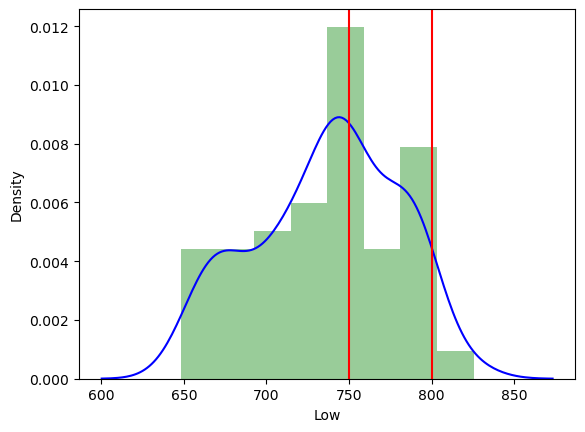

In [20]:
get_pdf_probability(dataset["Low"],750,800)

In [21]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9732\2909774602.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


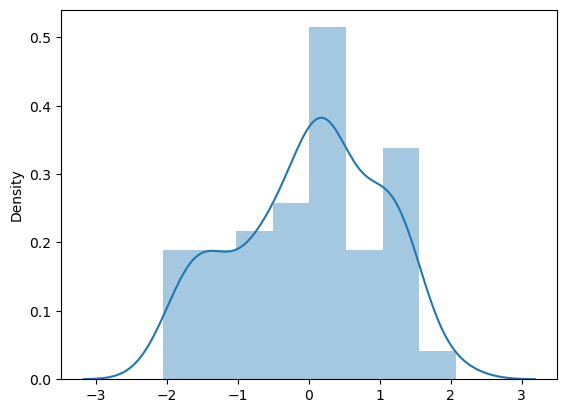

In [22]:
stdNBgraph(dataset["Low"])

In [23]:
def freqTable(columnName,dataset):
    import pandas as pd
    frq=pd.DataFrame()
    frq["Unique_Values"]=dataset[columnName].value_counts().index
    frq["Frequency"]=dataset[columnName].value_counts().values
    frq["Relative_Fre"]=dataset[columnName].value_counts().values/len(dataset[columnName])*100
    frq["Cumulative"]=frq["Relative_Fre"].cumsum()
    return frq

In [24]:
freqTable("Low",dataset)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,754.000000,2,1.398601,1.398601
1,755.000000,2,1.398601,2.797203
2,741.000000,2,1.398601,4.195804
3,776.000000,2,1.398601,5.594406
4,671.000000,1,0.699301,6.293706
...,...,...,...,...
134,787.700012,1,0.699301,97.202797
135,792.400024,1,0.699301,97.902098
136,795.400024,1,0.699301,98.601399
137,778.400024,1,0.699301,99.300699


In [25]:
freqTable("High",dataset)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,760.000000,3,2.097902,2.097902
1,764.000000,3,2.097902,4.195804
2,789.000000,2,1.398601,5.594406
3,751.450012,2,1.398601,6.993007
4,744.000000,2,1.398601,8.391608
...,...,...,...,...
127,797.349976,1,0.699301,97.202797
128,799.400024,1,0.699301,97.902098
129,805.900024,1,0.699301,98.601399
130,809.900024,1,0.699301,99.300699


In [26]:
fh=freqTable("High",dataset)

In [27]:
fh.sort_values(by="Frequency",ascending=False)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,760.000000,3,2.097902,2.097902
1,764.000000,3,2.097902,4.195804
2,789.000000,2,1.398601,5.594406
4,744.000000,2,1.398601,8.391608
5,749.000000,2,1.398601,9.790210
...,...,...,...,...
43,737.150024,1,0.699301,38.461538
42,725.250000,1,0.699301,37.762238
41,827.000000,1,0.699301,37.062937
40,699.900024,1,0.699301,36.363636


In [28]:
fhs=fh[fh["Frequency"]==2]["Unique_Values"].sort_values(ascending=False)

In [29]:
fhs

6    789.500000
2    789.000000
7    762.000000
8    755.000000
3    751.450012
5    749.000000
4    744.000000
Name: Unique_Values, dtype: float64

In [30]:
fhs.count()

7